<a class="anchor" id="0"></a>
# **House Rents in Madrid**
The main objective of this project is based in building a model for predicting house rents in Madrid, Spain. 
The dataset contains 2090 observations and 15 features which are described below:
- Id
- District
- Address
- Number
- Area
- Bedrooms 
- Sq. Mt
- Floor
- Outer 
- Elevator
- Penthouse
- Cottage
- Duplex
- Semidetached
- Rent (our target variable)

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1. [Data Ingestion](#1)
2. [Exploratory Analysis](#2)
3. [Data Manipulation](#3)
4. [Data Visualization](#4)
5. [Data Split](#5)
6. [Impact Encoding](#6)
7. [Standard Scaling](#7)
8. [Linear Regression model](#8)

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **1. Data Ingestion** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

In [2]:
data = pd.read_excel("houses_for_rent_madrid.xlsx")

# **2. Exploratory Analysis** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

First I try to understand what kind of data I have, including how many rows and features.

### Checking the type formats of each variable

In [3]:
data.dtypes

Id                int64
District         object
Address          object
Number           object
Area             object
Rent              int64
Bedrooms        float64
Sq.Mt             int64
Floor           float64
Outer           float64
Elevator        float64
Penthouse         int64
Cottage           int64
Duplex            int64
Semidetached      int64
dtype: object

### View top 5 rows of dataset

In [4]:
data.head()

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1390,Centro,Ático en calle de Alberto Aguilera,11,Malasaña-Universidad,2490,3.0,97,7.0,1.0,1.0,1,0,0,0
1,1896,San Blás,Piso en calle Luis Sánchez Polack Tip,NaN,Simancas,1300,3.0,110,4.0,1.0,1.0,0,0,0,0
2,1366,Centro,Estudio en Chueca-Justicia,NaN,Chueca-Justicia,800,NaN,33,NaN,NaN,0.0,0,0,0,0
3,1407,Carabanchel,Piso en San Isidro,NaN,San Isidro,600,1.0,45,2.0,1.0,1.0,0,0,0,0
4,1072,Arganzuela,Ático en Acacias,NaN,Acacias,1900,1.0,90,7.0,1.0,1.0,1,0,0,0


### Summary Statistics

In [5]:
data.describe(include='all')

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2089.000000,2089,2089,747,2085,2089.000000,2000.000000,2089.000000,1948.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,NaN,20,1336,137,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Salamanca,Piso en Recoletos,1,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,313,25,29,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1094.026807,NaN,NaN,NaN,NaN,1932.249402,2.483000,128.919579,25.662731,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,630.612544,NaN,NaN,NaN,NaN,1495.474485,1.305206,115.745014,975.065350,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,1.000000,NaN,NaN,NaN,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,550.000000,NaN,NaN,NaN,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1094.000000,NaN,NaN,NaN,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1636.000000,NaN,NaN,NaN,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


### Dimension of our Dataset

In [6]:
data.shape

(2089, 15)

### Checking for missing values

In [7]:
data.isnull().sum()

Id                 0
District           0
Address            0
Number          1342
Area               4
Rent               0
Bedrooms          89
Sq.Mt              0
Floor            141
Outer            162
Elevator         133
Penthouse          0
Cottage            0
Duplex             0
Semidetached       0
dtype: int64

# **3. Data Manipulation** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

### Drop redundant columns

We should drop any redundant columns from the dataset which does not have any predictive power. Here, `Id`, `District`, `Address`, `Number` are the redundant column. So, I will drop them first.

In [8]:
data1=data.drop(columns=['Id','District','Address','Number'])

### Imputing Missing Values with average

I replace the Nan with the mean of the observed values in that column

In [9]:
data1['Floor'].fillna(data1['Floor'].mean(),inplace=True)
data1['Bedrooms'].fillna(data1['Bedrooms'].mean(),inplace=True)
data1['Sq.Mt'].fillna(data1['Sq.Mt'].mean(),inplace=True)

### Remove all rows with a missing value.
(Note: "Bedrooms", "Floor" and "Area" do not have missing value because of the imputation in the last part).

In [10]:
# Replacing alternative representations with NaN
data1.replace(['None', 'NA', 'NaN', ''], pd.NA, inplace=True)
data1.dropna(axis=0, inplace=True)
data1.isna().sum()

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
dtype: int64

### Remove Outliers in Floor


In [11]:
data1=data1[data1['Floor']<=20]

### Correlation Matrix of Numerical Variables
I removed object type variable: `Area`. We can notice that there is a strong positive correlation between `Rent`(our target) and `Sq.Mt`

In [12]:
data2=data1.drop(columns=['Area'])
correlation_matrix = data2.corr()
correlation_matrix

,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
Rent,1.000000,0.549526,0.825340,0.146469,0.164670,0.202992,0.130626,0.018640,0.059262,0.016022
Bedrooms,0.549526,1.000000,0.724344,0.052892,0.176442,0.105195,-0.014144,0.067218,0.044700,0.045511
Sq.Mt,0.825340,0.724344,1.000000,0.100254,0.206235,0.183513,0.094109,0.104805,0.121784,0.082272
Floor,0.146469,0.052892,0.100254,1.000000,0.106934,0.215629,0.250732,-0.051749,0.016211,-0.042242
Outer,0.164670,0.176442,0.206235,0.106934,1.000000,0.157876,0.078409,-0.104071,0.019020,-0.084951
Elevator,0.202992,0.105195,0.183513,0.215629,0.157876,1.000000,0.058465,-0.114645,0.027236,-0.093583
Penthouse,0.130626,-0.014144,0.094109,0.250732,0.078409,0.058465,1.000000,-0.012257,-0.057547,-0.010005
Cottage,0.018640,0.067218,0.104805,-0.051749,-0.104071,-0.114645,-0.012257,1.000000,-0.007445,0.816281
Duplex,0.059262,0.044700,0.121784,0.016211,0.019020,0.027236,-0.057547,-0.007445,1.000000,-0.006077
Semidetached,0.016022,0.045511,0.082272,-0.042242,-0.084951,-0.093583,-0.010005,0.816281,-0.006077,1.000000


### Correlation Heat Map

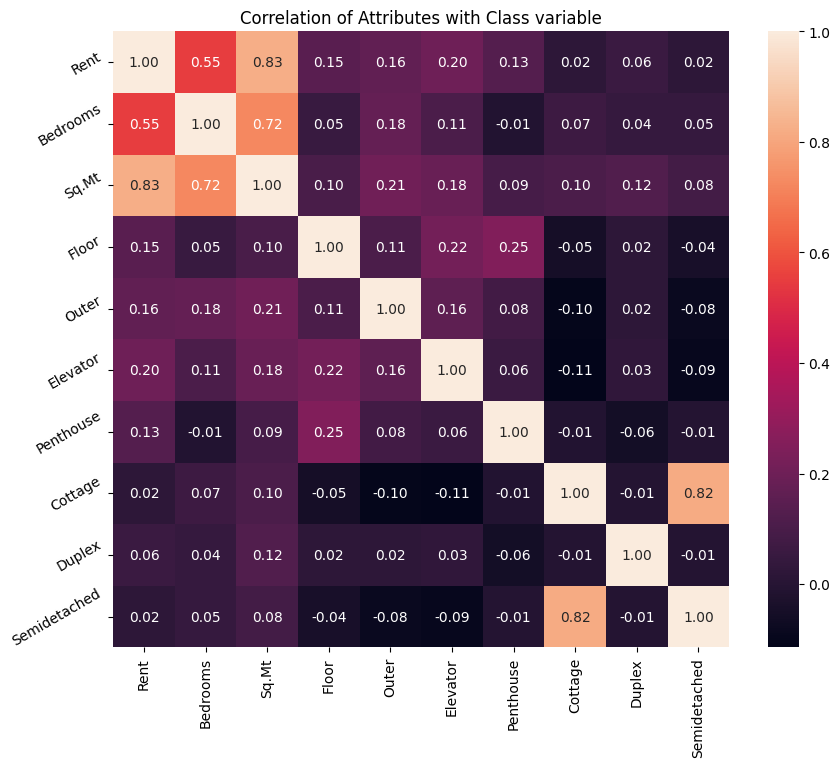

In [13]:
# Make a correlationb heat map for data2 with sns
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a=sns.heatmap(correlation_matrix, square= True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# **4. Data Visualization** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

### Plot a histogram of Bedrooms, Floor and Sq.Mt

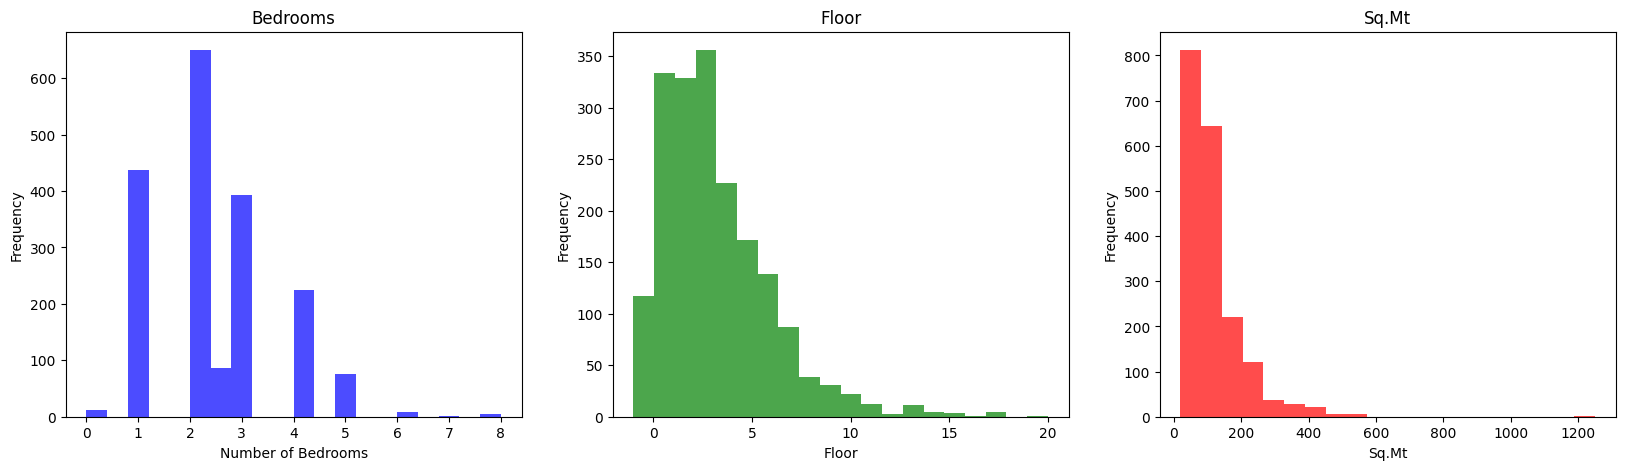

In [14]:
#Plot a 3 histograms of bedrooms, floor and Sq.Mt in the same figure
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(data1['Bedrooms'], bins=20, color='blue', alpha=0.7)
plt.title('Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
plt.hist(data1['Floor'], bins=20, color='green', alpha=0.7)
plt.title('Floor')
plt.xlabel('Floor')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
plt.hist(data1['Sq.Mt'], bins=20, color='red', alpha=0.7)
plt.title('Sq.Mt')
plt.xlabel('Sq.Mt')
plt.ylabel('Frequency')
plt.show()

### Boxplots of Numeric Columns

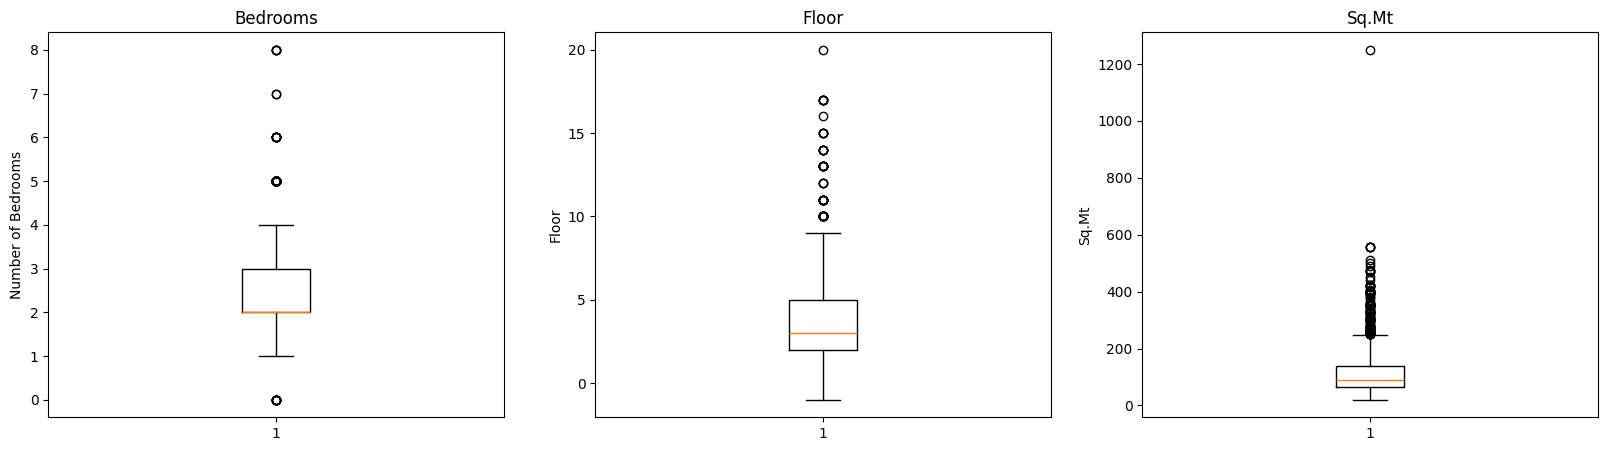

In [15]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.boxplot(data1['Bedrooms'])
plt.title('Bedrooms')
plt.ylabel('Number of Bedrooms')
plt.subplot(1, 3, 2)
plt.boxplot(data1['Floor'])
plt.title('Floor')
plt.ylabel('Floor')
plt.subplot(1, 3, 3)
plt.boxplot(data1['Sq.Mt'])
plt.title('Sq.Mt')
plt.ylabel('Sq.Mt')
plt.show()

# **5. Split data to train (70%) and val (15%) and test (15%)** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)



In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data1, test_size=0.3)
test, val=train_test_split(test, test_size=0.5)


# **6. Impact encode "Area" with respect to target variable** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

The encoding is computed only using the training set, but must be applied to the val and test set as well.  If the val/test set contain rows with "Area" that was not observed in the training, then the encoding cannot be computed for those rows, and they should be removed.

In [17]:
area_means = train.groupby('Area')['Rent'].mean()
for dataset in [train, val, test]:
    dataset['Area_encoded'] = dataset['Area'].map(area_means)

for dataset in [train, val, test]:
    dataset.drop(columns=['Area'], inplace=True)

# **7. Feature Scaling** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

Scaling is a way to generate unitless features that have same magnitude. We are going to use Standard Scaling which is based in replacing each value of a feature with its difference from the mean, measured in units of standard deviation.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)

# **8. Linear Regression** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

Running linear regression using numerical features only (including the newly created impact encoding).  Train on the training set only, computing and printing the mean-squared-error on the validation set.

In [19]:
test.dropna(axis=0, inplace=True)
train.dropna(axis=0, inplace=True)
lr = LinearRegression()
lr.fit(train[['Bedrooms','Sq.Mt','Floor','Area_encoded']], train['Rent'])
print (f"Train R^2 score: {lr.score(train[['Bedrooms','Sq.Mt','Floor','Area_encoded']], train['Rent'])}")
print (f"Test R^2 score: {lr.score(test[['Bedrooms','Sq.Mt','Floor','Area_encoded']], test['Rent'])}")

train['y_predicted'] = lr.predict(train[['Bedrooms','Sq.Mt','Floor','Area_encoded']])
test['y_predicted'] = lr.predict(test[['Bedrooms','Sq.Mt','Floor','Area_encoded']])
print (f"Train MSE: {mean_squared_error(train['Rent'], train['y_predicted'])}")
print (f"Test MSE: {mean_squared_error(test['Rent'], test['y_predicted'])}")

Train R^2 score: 0.7474019655718696
Test R^2 score: 0.8319357029371378
Train MSE: 475453.5064001335
Test MSE: 259432.1415788135


### Plot of the OLS line 

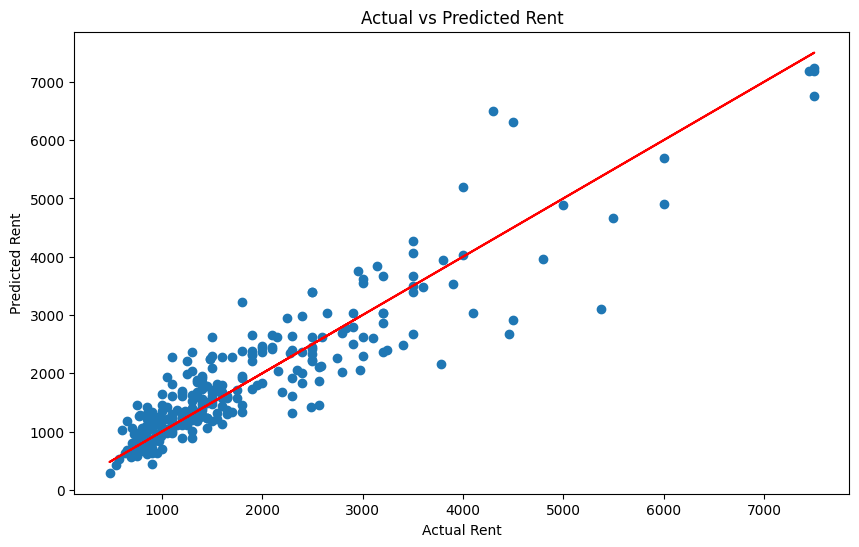

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(test['Rent'], test['y_predicted'])
plt.plot(test['Rent'], test['Rent'], color='red')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')
plt.show()